# 문자열 데이터 요약하기 & 판다스로 시각화하기

## 학습목표
- 기초 통계로 데이터의 분포를 살펴보고, 시각화하기

## 핵심키워드
- unique() / nunique()
- value_counts()
- barh(), pie chart()

## 학습하기

In [11]:
# 기본셋팅
import pandas as pd
import numpy as np
import seaborn

import matplotlib.pyplot as plt
# window 의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

# 폰트가 선명하게 보이기 위해
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 데이터 불러오기
df = pd.read_csv('source/dataset.csv', low_memory=False)

# 데이터 확인하기
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993


### 중복제거한 값 보기
- unique()

In [2]:
# df.describe(include="object")로 문자열 데이터를 요약하여 보면 unique라는 수치가 나옵니다. unique는 값의 종류가 몇 개인지를 보여줍니다.

# 1) 상권업종 대분류명
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [3]:
df['상권업종대분류명'].nunique()

1

In [4]:
# 2) 상권업종 중분류명
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [5]:
df['상권업종중분류명'].nunique()

5

In [9]:
# 3) 상권업종 소분류명
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [7]:
df['상권업종소분류명'].nunique() # len( df['상권업종소분류명'].unique() )

34

### 그룹화된 요약값 보기
- `value_counts()` 을 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있다.
- 범주형 데이터 갯수 셀때 사용

In [13]:
df['시도명'].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [18]:
# df['시도명']
city = df['시도명'].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [19]:
# normalize = True 옵션을 사용하면 비율을 구할 수 있다.
city_normalize = df['시도명'].value_counts(normalize=True)
round(df['시도명'].value_counts(normalize=True) * 100, 2)

경기도        23.50
서울특별시      20.83
부산광역시       7.12
경상남도        5.47
인천광역시       5.19
대구광역시       5.05
경상북도        4.55
전라북도        4.28
충청남도        3.93
전라남도        3.54
광주광역시       3.53
대전광역시       3.37
충청북도        2.94
강원도         2.90
울산광역시       2.20
제주특별자치도     1.20
세종특별자치시     0.39
Name: 시도명, dtype: float64

### 시각화하기

<AxesSubplot:>

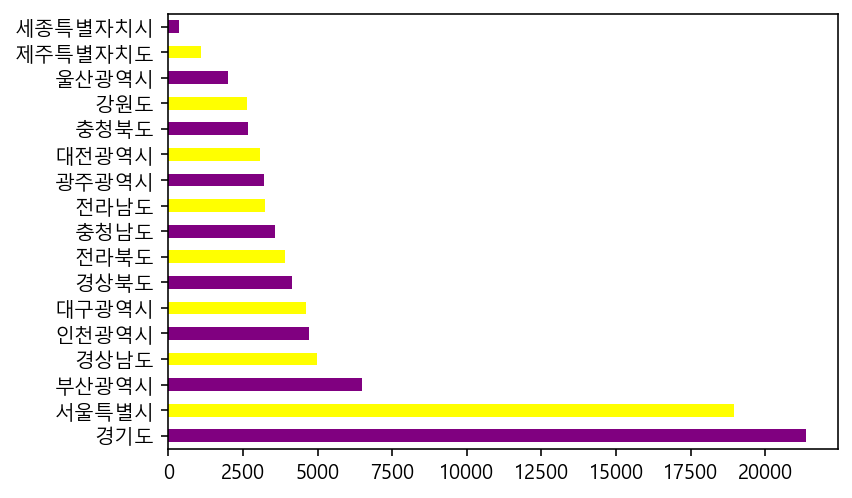

In [67]:
# city.plot(kind='bar', ylim=(0, 25000))
city.plot.barh(color=["purple","yellow"])

<AxesSubplot:ylabel='시도명'>

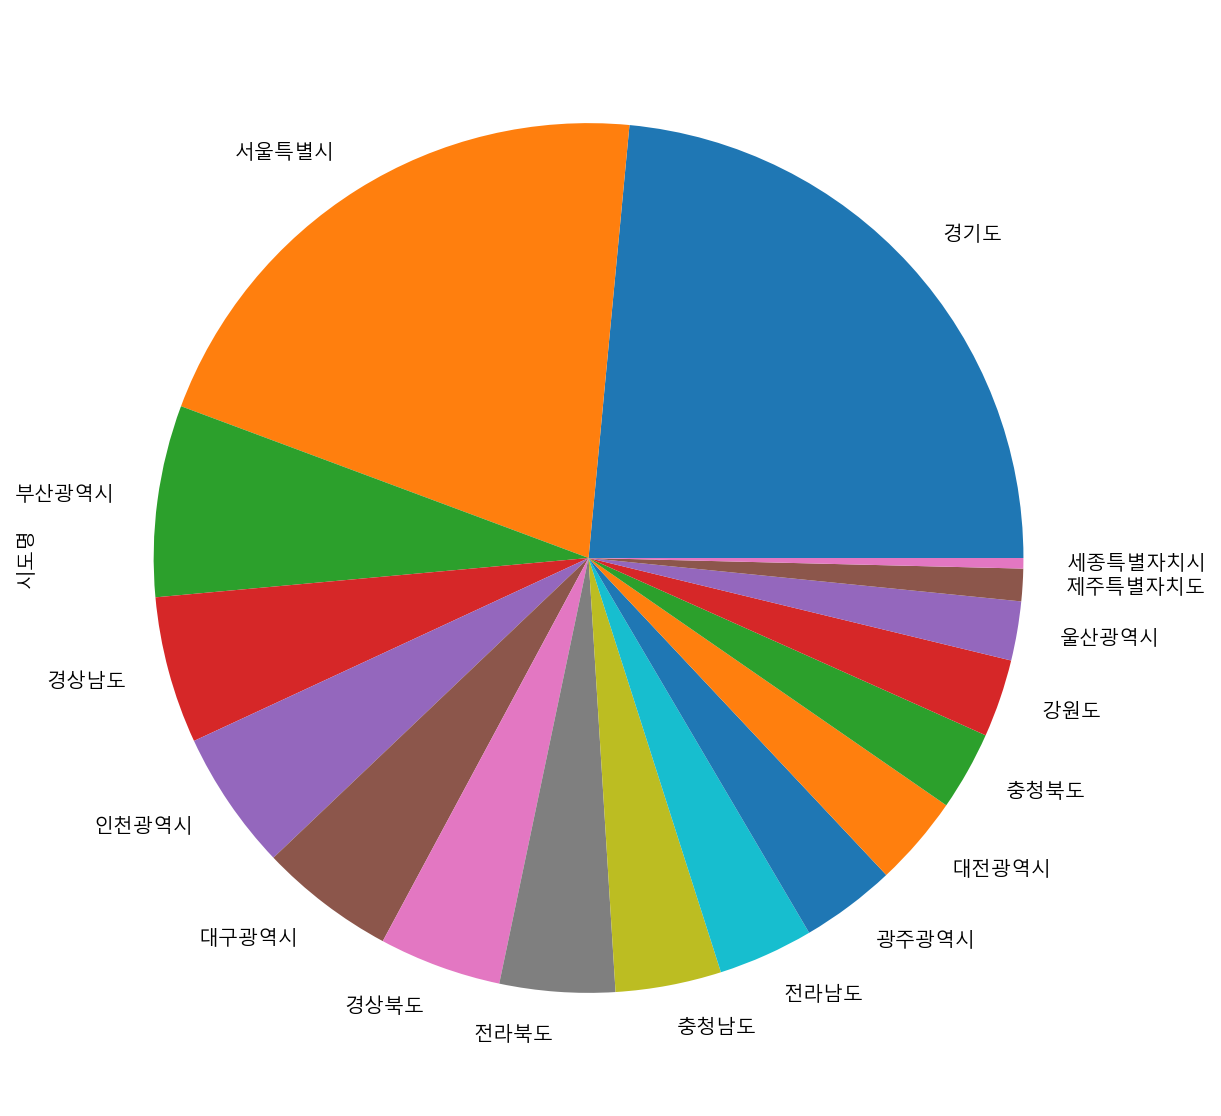

In [69]:
# 판다스의 plot.pie() 를 사용하여 파이그래프를 그려봅시다.
city.plot.pie(figsize=(10, 10))